Importação das bibliotecas necessárias.

In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Para facilitar o entendimento do banco de dados, exclui-se a coluna 13 que não é necessária e renomeia-se as colunas.

In [2]:
data = pd.read_csv("Dataset_spine.csv")
data = data.drop(['Unnamed: 13'], axis=1)
data.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

In [3]:
y = data['class']
x = data.drop(['class'], axis = 1)
data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


Utiliza-se apenas 20% dos dados do banco de dados para usar como treinamento e o restante será alocado para uso no teste.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

Utiliza-se três camadas de unidades de processamento intermediário, a função sigmoidal como função de ativação e 500 como númrero máximo de interações.

In [5]:
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)

Iteration 1, loss = 0.64699710
Iteration 2, loss = 0.64178186
Iteration 3, loss = 0.63778467
Iteration 4, loss = 0.63550049
Iteration 5, loss = 0.63354912
Iteration 6, loss = 0.63184340
Iteration 7, loss = 0.63065593
Iteration 8, loss = 0.62907951
Iteration 9, loss = 0.62756442
Iteration 10, loss = 0.62573880
Iteration 11, loss = 0.62380375
Iteration 12, loss = 0.62154187
Iteration 13, loss = 0.61931788
Iteration 14, loss = 0.61665258
Iteration 15, loss = 0.61375022
Iteration 16, loss = 0.61085673
Iteration 17, loss = 0.60773244
Iteration 18, loss = 0.60399598
Iteration 19, loss = 0.59951720
Iteration 20, loss = 0.59434223
Iteration 21, loss = 0.58813329
Iteration 22, loss = 0.58217381
Iteration 23, loss = 0.57602792
Iteration 24, loss = 0.56878620
Iteration 25, loss = 0.56105643
Iteration 26, loss = 0.55279656
Iteration 27, loss = 0.54479204
Iteration 28, loss = 0.53567061
Iteration 29, loss = 0.52626177
Iteration 30, loss = 0.51759395
Iteration 31, loss = 0.50849511
Iteration 32, los

c:\users\jeff\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 50, 25),
              max_iter=500, random_state=42, verbose=True)

In [6]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8225806451612904

Como pode-se ver, chegou-se a uma acurácia de 82% utilizando essa configuração de MLP.

In [7]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Abnormal       0.88      0.86      0.87        44
      Normal       0.68      0.72      0.70        18

    accuracy                           0.82        62
   macro avg       0.78      0.79      0.79        62
weighted avg       0.83      0.82      0.82        62



O relatório nos mostra que obteve-se uma *precision* de 88% nos casos anormais e 68% nos casos normais, e um *recall* de 86% nos casos anormais e 72% nos casos normais.

In [8]:
y.value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

Como o banco de dados é desbalanceado, visto o número de casos anormais e normais, o valor da acurácia não é um boa métrica para avaliar a MLP, portanto, deve-se atentar as métricas *precision* e *recall* do *report*, pois são elas que nos dirão se o MLP está classificando corretamente os casos. *Precision* se diz respeito a porcentagem dos casos selecionados daquela classe que foram classificados corretamente, já *recall* significa a porcentagem dos casos totais daquela classe que seriam classificados corretamente.

Vamos agora alterar alguns dos parâmetros da MLP:

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.67024566
Iteration 2, loss = 0.64236872
Iteration 3, loss = 0.63358321
Iteration 4, loss = 0.63752815
Iteration 5, loss = 0.64198806
Iteration 6, loss = 0.64131365
Iteration 7, loss = 0.63844617
Iteration 8, loss = 0.63671240
Iteration 9, loss = 0.63381061
Iteration 10, loss = 0.62967288
Iteration 11, loss = 0.62449397
Iteration 12, loss = 0.62125073
Iteration 13, loss = 0.61740508
Iteration 14, loss = 0.61322855
Iteration 15, loss = 0.60866736
Iteration 16, loss = 0.60480839
Iteration 17, loss = 0.59977024
Iteration 18, loss = 0.59384897
Iteration 19, loss = 0.58738872
Iteration 20, loss = 0.58148577
Iteration 21, loss = 0.57477812
Iteration 22, loss = 0.56644647
Iteration 23, loss = 0.55708925
Iteration 24, loss = 0.54686711
Iteration 25, loss = 0.53596548
Iteration 26, loss = 0.52380761
Iteration 27, loss = 0.51139480
Iteration 28, loss = 0.49765665
Iteration 29, loss = 0.48454518
Iteration 30, loss = 0.47046950
Iteration 31, loss = 0.45711939
Iteration 32, los

Como pode-se ver a acurácia, *precison* e o *recall* não mudaram muito.

Vamos agora tentar descobrir quais são as melhores variáveis para utilizar no nosso banco de dados da MLP para tentar maximizar a precisão dos casos.

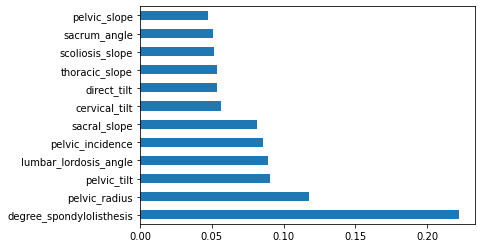

In [10]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

O gráfico nos mostra em ordem cresente as variáveis que mais impactam na classificação dos casos, logo, vamos descartar as primeiras 6 e utilizar o resto.

In [11]:
new_data = data[['degree_spondylolisthesis', 'pelvic_radius', 'pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'class']]
y = new_data['class']
x = new_data.drop(['class'], axis = 1)

Vamos treinar várias configurações de MLP para tentar descobrir uma possível boa implementação de MLP para o problema. 

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)


Iteration 1, loss = 0.70112488
Iteration 2, loss = 0.68654367
Iteration 3, loss = 0.67462953
Iteration 4, loss = 0.66398732
Iteration 5, loss = 0.65432369
Iteration 6, loss = 0.64666128
Iteration 7, loss = 0.64006787
Iteration 8, loss = 0.63399689
Iteration 9, loss = 0.63055873
Iteration 10, loss = 0.62797376
Iteration 11, loss = 0.62460442
Iteration 12, loss = 0.62275161
Iteration 13, loss = 0.62038554
Iteration 14, loss = 0.61821419
Iteration 15, loss = 0.61588486
Iteration 16, loss = 0.61339693
Iteration 17, loss = 0.61064566
Iteration 18, loss = 0.60747443
Iteration 19, loss = 0.60388243
Iteration 20, loss = 0.60041992
Iteration 21, loss = 0.59622385
Iteration 22, loss = 0.59223184
Iteration 23, loss = 0.58780858
Iteration 24, loss = 0.58354370
Iteration 25, loss = 0.57911310
Iteration 26, loss = 0.57405196
Iteration 27, loss = 0.56849718
Iteration 28, loss = 0.56288560
Iteration 29, loss = 0.55697413
Iteration 30, loss = 0.55057633
Iteration 31, loss = 0.54448569
Iteration 32, los

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.92920079
Iteration 2, loss = 0.82382960
Iteration 3, loss = 0.74420212
Iteration 4, loss = 0.68556225
Iteration 5, loss = 0.65105628
Iteration 6, loss = 0.63663051
Iteration 7, loss = 0.63306369
Iteration 8, loss = 0.63498458
Iteration 9, loss = 0.63990479
Iteration 10, loss = 0.64611492
Iteration 11, loss = 0.64727877
Iteration 12, loss = 0.64367007
Iteration 13, loss = 0.63714182
Iteration 14, loss = 0.63000314
Iteration 15, loss = 0.62114728
Iteration 16, loss = 0.61419522
Iteration 17, loss = 0.60774688
Iteration 18, loss = 0.60491405
Iteration 19, loss = 0.60188012
Iteration 20, loss = 0.60046049
Iteration 21, loss = 0.59861906
Iteration 22, loss = 0.59550898
Iteration 23, loss = 0.59079922
Iteration 24, loss = 0.58449005
Iteration 25, loss = 0.57702586
Iteration 26, loss = 0.56996210
Iteration 27, loss = 0.56371703
Iteration 28, loss = 0.55889126
Iteration 29, loss = 0.55414330
Iteration 30, loss = 0.54803574
Iteration 31, loss = 0.53917196
Iteration 32, los

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=13)
clf = MLPClassifier(max_iter=500, alpha=0.0001, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 20.69954058
Iteration 2, loss = 17.45414525
Iteration 3, loss = 14.12271405
Iteration 4, loss = 10.91843933
Iteration 5, loss = 7.93594996
Iteration 6, loss = 5.39944017
Iteration 7, loss = 3.36831117
Iteration 8, loss = 1.86890656
Iteration 9, loss = 0.93022304
Iteration 10, loss = 0.47371605
Iteration 11, loss = 0.62992659
Iteration 12, loss = 1.09144595
Iteration 13, loss = 1.43538747
Iteration 14, loss = 1.53020915
Iteration 15, loss = 1.42305755
Iteration 16, loss = 1.17662565
Iteration 17, loss = 0.88275699
Iteration 18, loss = 0.63388757
Iteration 19, loss = 0.54004010
Iteration 20, loss = 0.54754307
Iteration 21, loss = 0.60516257
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
0.8387096774193549
              precision    recall  f1-score   support

    Abnormal       0.94      0.80      0.86        20
      Normal       0.71      0.91      0.80        11

    accuracy                           0.84        31
   mac

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=13)
clf = MLPClassifier(hidden_layer_sizes=(100,300,500), max_iter=500, alpha=0.0001, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 3.69713294
Iteration 2, loss = 6.60452249
Iteration 3, loss = 3.54168482
Iteration 4, loss = 0.85937367
Iteration 5, loss = 2.36375937
Iteration 6, loss = 1.06177106
Iteration 7, loss = 0.97664849
Iteration 8, loss = 1.37695574
Iteration 9, loss = 0.59091674
Iteration 10, loss = 0.74282768
Iteration 11, loss = 0.84873940
Iteration 12, loss = 0.52394649
Iteration 13, loss = 0.43408920
Iteration 14, loss = 0.56121227
Iteration 15, loss = 0.34996545
Iteration 16, loss = 0.42386932
Iteration 17, loss = 0.46268064
Iteration 18, loss = 0.35607867
Iteration 19, loss = 0.39514368
Iteration 20, loss = 0.36827330
Iteration 21, loss = 0.32667428
Iteration 22, loss = 0.35669741
Iteration 23, loss = 0.33869100
Iteration 24, loss = 0.31864540
Iteration 25, loss = 0.33117727
Iteration 26, loss = 0.32048783
Iteration 27, loss = 0.31944979
Iteration 28, loss = 0.32030872
Iteration 29, loss = 0.31070669
Iteration 30, loss = 0.32236142
Iteration 31, loss = 0.31875212
Iteration 32, los

Pode-se ver que as últimas duas configurações de MLP apresentam excelentes resultados de acurácia, *precision* e *recall*, portanto, são possíveis boas candidatas a serem implementadas.

A equipe levantou a hipótese de que o fato de a quantidade de dados "Abnormal" estar acima da quantidade de dados "Normal" está baixando a precisão para classificação de dados "Normal" nos primeiros exemplos deste ralatório e baixando a acurácia geral nos dois exemplos acima (melhores resultados até então). Para testar isso, vamos igualar a quantidade de dados "Abnormal" e "Normal" com duas abordagens. Primeiro, expluindo os 110 primeiros dados "Abnormal" e depois, excluindo 110 dados "Abnormal" de modo aleatório.


Abaixo, segue o exemplo excluindo os 110 primeiros dados "Abnormal", utilizando o dataset do primeiro experimento e o MLP classifier do primeiro experimento, ou seja, antes da aplicação de todas as melhorias propostas pelos experimentos acima:

In [16]:
data1 = pd.read_csv("Dataset_spine.csv")
data1 = data1.drop(['Unnamed: 13'], axis=1)
data1.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

new_data_copy = data1

new_data3 = new_data_copy.copy()

for i in range(110):
    new_data3.drop((i+1),axis=0,inplace=True)

y = new_data3['class']
x = new_data3.drop(['class'], axis = 1)
print(y.value_counts())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Normal      100
Abnormal    100
Name: class, dtype: int64
Iteration 1, loss = 0.70557907
Iteration 2, loss = 0.70216837
Iteration 3, loss = 0.69914504
Iteration 4, loss = 0.69651227
Iteration 5, loss = 0.69426537
Iteration 6, loss = 0.69238677
Iteration 7, loss = 0.69084330
Iteration 8, loss = 0.68958895
Iteration 9, loss = 0.68856457
Iteration 10, loss = 0.68769780
Iteration 11, loss = 0.68690556
Iteration 12, loss = 0.68610178
Iteration 13, loss = 0.68520861
Iteration 14, loss = 0.68416510
Iteration 15, loss = 0.68293005
Iteration 16, loss = 0.68147986
Iteration 17, loss = 0.67980555
Iteration 18, loss = 0.67790815
Iteration 19, loss = 0.67579307
Iteration 20, loss = 0.67346696
Iteration 21, loss = 0.67093678
Iteration 22, loss = 0.66821015
Iteration 23, loss = 0.66529510
Iteration 24, loss = 0.66219665
Iteration 25, loss = 0.65891446
Iteration 26, loss = 0.65543999
Iteration 27, loss = 0.65175675
Iteration 28, loss = 0.64784587
Iteration 29, loss = 0.64369002
Iteration 30, loss = 0.

Percebe-se que podemos alcançar resultados similares aos dois melhores resultados apresentados até então apenas com esta técnica.

Agora iremos verificar como ficam os valores de precision, accurary e recall, se mudarmos a proporção entre o set_train e set_test no caso em considerarços o DataSet original, o DataSet após a exclusão das 6 primeiras variáveis, e o DataSet após a exclusão de 110 casos anormais.

Mudando a proporção entre a quantidade de dados no conjunto de treinamento e a quantidade de dados no conjunto de teste. 
Deixaremos 40% para o conjunto de treinamento e 60% para o de teste.

No caso com o DataSet original:

In [17]:
y = data['class']
x = data.drop(['class'], axis = 1)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.67084220
Iteration 2, loss = 0.65056247
Iteration 3, loss = 0.63627528
Iteration 4, loss = 0.62758501
Iteration 5, loss = 0.62371144
Iteration 6, loss = 0.62340548
Iteration 7, loss = 0.62505864
Iteration 8, loss = 0.62707060
Iteration 9, loss = 0.62831042
Iteration 10, loss = 0.62829727
Iteration 11, loss = 0.62706532
Iteration 12, loss = 0.62493334
Iteration 13, loss = 0.62231877
Iteration 14, loss = 0.61961870
Iteration 15, loss = 0.61714005
Iteration 16, loss = 0.61506189
Iteration 17, loss = 0.61342285
Iteration 18, loss = 0.61213405
Iteration 19, loss = 0.61101758
Iteration 20, loss = 0.60986145
Iteration 21, loss = 0.60847490
Iteration 22, loss = 0.60673110
Iteration 23, loss = 0.60458702
Iteration 24, loss = 0.60207441
Iteration 25, loss = 0.59927404
Iteration 26, loss = 0.59628608
Iteration 27, loss = 0.59319626
Iteration 28, loss = 0.59004313
Iteration 29, loss = 0.58680274
Iteration 30, loss = 0.58339684
Iteration 31, loss = 0.57971684
Iteration 32, los

Usando a mesma proporção de 40% e 60%, só que agora considerando a exclusão das 6 primerias variáveis.

In [20]:
y = new_data['class']
x = new_data.drop(['class'], axis = 1)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.70319625
Iteration 2, loss = 0.69528650
Iteration 3, loss = 0.68776258
Iteration 4, loss = 0.68062433
Iteration 5, loss = 0.67387756
Iteration 6, loss = 0.66753008
Iteration 7, loss = 0.66158698
Iteration 8, loss = 0.65605030
Iteration 9, loss = 0.65092011
Iteration 10, loss = 0.64619428
Iteration 11, loss = 0.64186780
Iteration 12, loss = 0.63793220
Iteration 13, loss = 0.63437521
Iteration 14, loss = 0.63118063
Iteration 15, loss = 0.62832892
Iteration 16, loss = 0.62579848
Iteration 17, loss = 0.62356623
Iteration 18, loss = 0.62160715
Iteration 19, loss = 0.61989356
Iteration 20, loss = 0.61839507
Iteration 21, loss = 0.61707882
Iteration 22, loss = 0.61591014
Iteration 23, loss = 0.61485375
Iteration 24, loss = 0.61387542
Iteration 25, loss = 0.61294359
Iteration 26, loss = 0.61203046
Iteration 27, loss = 0.61111243
Iteration 28, loss = 0.61017012
Iteration 29, loss = 0.60918758
Iteration 30, loss = 0.60815170
Iteration 31, loss = 0.60705222
Iteration 32, los

c:\users\jeff\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


E agora considerando a mesma porporção de 40% e 60%, só que considerando a exclusão de 110 casos anormais. 

In [ ]:
y = new_data3['class']
x = new_data3.drop(['class'], axis = 1)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.4, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.70319625
Iteration 2, loss = 0.69528650
Iteration 3, loss = 0.68776258
Iteration 4, loss = 0.68062433
Iteration 5, loss = 0.67387756
Iteration 6, loss = 0.66753008
Iteration 7, loss = 0.66158698
Iteration 8, loss = 0.65605030
Iteration 9, loss = 0.65092011
Iteration 10, loss = 0.64619428
Iteration 11, loss = 0.64186780
Iteration 12, loss = 0.63793220
Iteration 13, loss = 0.63437521
Iteration 14, loss = 0.63118063
Iteration 15, loss = 0.62832892
Iteration 16, loss = 0.62579848
Iteration 17, loss = 0.62356623
Iteration 18, loss = 0.62160715
Iteration 19, loss = 0.61989356
Iteration 20, loss = 0.61839507
Iteration 21, loss = 0.61707882
Iteration 22, loss = 0.61591014
Iteration 23, loss = 0.61485375
Iteration 24, loss = 0.61387542
Iteration 25, loss = 0.61294359
Iteration 26, loss = 0.61203046
Iteration 27, loss = 0.61111243
Iteration 28, loss = 0.61017012
Iteration 29, loss = 0.60918758
Iteration 30, loss = 0.60815170
Iteration 31, loss = 0.60705222
Iteration 32, los

c:\users\jeff\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Checando os valores de precision, recall e accuracy para os três casos, podemos observar que a mudança de proporção de 20% para 40% do set_train, não resultou em melhoras significativas. Tivemos um pequeno aumento da accurary de 78% para 81%, porém no caso da precision dos casos anormais, por exemplo, tivemos uma diminuição de 1%.